# Word Clouds

Tutorial adapted from https://www.geeksforgeeks.org/generating-word-cloud-python/ 

Uses https://amueller.github.io/word_cloud/ 

Text source:  https://www.gutenberg.org/ebooks/2701 

In [3]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ------------------------------- -------- 235.5/299.9 kB 7.3 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 6.2 MB/s eta 0:00:00


In [4]:
import re
import wordcloud as wc 

### Data import, cleaning

Downloaded file from Project Gutenburg, then manually deleted header and footer content added to the text.

In [10]:
with open("pg2701.txt", "r", encoding="utf-8") as f:
    text = f.read() # book is now one long string
    
# get rid of punctuation and capitalization 
text = re.sub(r'[^A-Za-z\s]', '', text)
text = text.lower()

text[5000:7000]

'aulted\n  websters dictionary\n\n  whale    it is more immediately from the dut and ger wallen\n  as walwian to roll to wallow richardsons dictionary\n\n\n                   hebrew\n                greek\n  cetus              latin\n  whl               anglosaxon\n  hvalt              danish\n  wal                dutch\n  hwal               swedish\n  whale              icelandic\n  whale              english\n  ballena            spanish\n  pekeenueenuee    fegee\n  peheenueenuee    erromangoan\n\n\n\n  extracts supplied by a subsublibrarian\n\n\n\n  it will be seen that this mere painstaking burrower and grubworm of\n  a poor devil of a subsub appears to have gone through the long\n  vaticans and streetstalls of the earth picking up whatever random\n  allusions to whales he could anyways find in any book whatsoever\n  sacred or profane therefore you must not in every case at least\n  take the higgledypiggledy whale statements however authentic in\n  these extracts for veritable gosp

In [12]:
wc.STOPWORDS # words to filter out

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [13]:
# remove stopwords from book text 
stopwords = set(re.sub(r'[^A-Za-z\s]', '', x) for x in wc.STOPWORDS )
text = ' '.join(word for word in text.split() if word not in stopwords)


In [1]:
# display word cloud

import matplotlib.pyplot as plt
wordcloud = wc.WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Moby Dick Word Cloud")
plt.show()

NameError: name 'wc' is not defined

### Customizations

Limit number of words

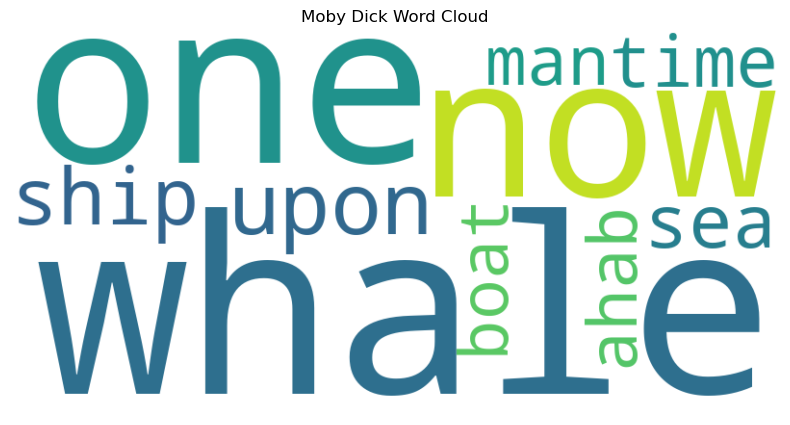

In [17]:
# display word cloud
wordcloud = wc.WordCloud(max_words = 10, width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Moby Dick Word Cloud")
plt.show()

Change word colors

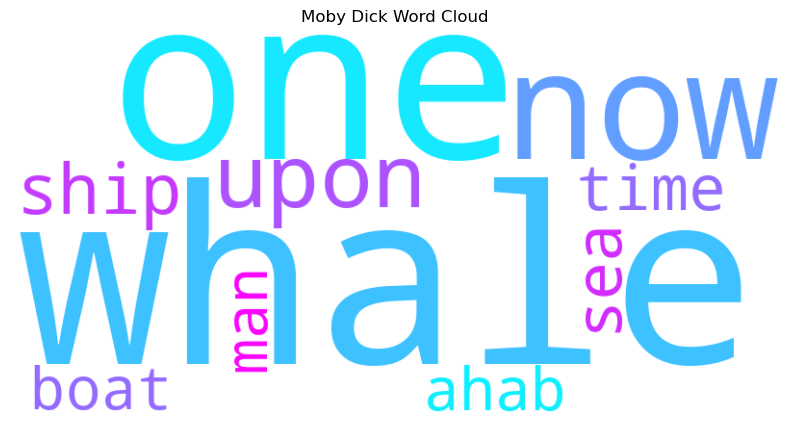

In [44]:
import matplotlib as mpl
import random
import colorsys

def rgb_to_hsl(rgba):
  """Converts RGB color values (ranging from 0 to 255) to HSL values (hue: 0-360, saturation: 0-1, lightness: 0-1)."""

  r, g, b, a = rgba
  
  h, l, s = colorsys.rgb_to_hls(r, g, b)
  
  h_degrees = h * 360 
  
  return h_degrees, s, l

def color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    cmap = mpl.colormaps["cool"] # Choose color map to use 
    rgba = cmap(random.uniform(0, 1)) # random samples from color map 
    
    hsl = rgb_to_hsl(rgba)
    
    return f"hsl({hsl[0]}, {hsl[1] * 100}%, {hsl[2] * 100}%)"


# display word cloud
cur_cloud = wc.WordCloud(max_words = 10, width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(cur_cloud.recolor(color_func=color_func), interpolation='bilinear')
plt.axis('off')  
plt.title("Moby Dick Word Cloud")
plt.show()

Choose word cloud shape
* Create a "mask" to use for words 

In [3]:
from PIL import Image
import numpy as np

whale_mask = np.array(Image.open("whale.jpg"))

# display word cloud
cur_cloud = wc.WordCloud(max_words = 200, mask = whale_mask, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(cur_cloud.recolor(color_func=color_func), interpolation='bilinear')
plt.axis('off')  
plt.title("Moby Dick Word Cloud")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'whale.jpg'

Create multiple word clouds by topic
* First find the most frequent words
* Then sort by topic (either manually or by AI)

In [55]:
word_dict = {}
for w in text.split():
    if w in word_dict:
        word_dict[w] += 1
    else:
        word_dict[w] = 1
        
# find most frequent words 
pairs = [(word_dict[w], w) for w in word_dict]
pairs.sort(reverse = True) 

print([pairs[i][1] for i in range(200)])

['whale', 'one', 'now', 'upon', 'old', 'man', 'ye', 'ahab', 'whales', 'will', 'ship', 'sea', 'though', 'yet', 'time', 'long', 'chapter', 'still', 'great', 'said', 'captain', 'two', 'seemed', 'must', 'last', 'head', 'thou', 'see', 'way', 'white', 'little', 'boat', 'round', 'sperm', 'three', 'first', 'may', 'stubb', 'every', 'us', 'say', 'men', 'much', 'queequeg', 'never', 'hand', 'good', 'almost', 'go', 'side', 'even', 'thing', 'might', 'look', 'boats', 'made', 'away', 'come', 'starbuck', 'among', 'water', 'many', 'sir', 'seen', 'deck', 'day', 'far', 'ships', 'eyes', 'without', 'world', 'sort', 'cried', 'back', 'thought', 'part', 'know', 'right', 'oh', 'whole', 'life', 'air', 'crew', 'aye', 'let', 'take', 'thus', 'thee', 'soon', 'night', 'came', 'tell', 'things', 'pequod', 'hands', 'feet', 'small', 'till', 'something', 'line', 'god', 'think', 'whaling', 'towards', 'found', 'thy', 'full', 'called', 'make', 'another', 'times', 'nothing', 'along', 'saw', 'place', 'poor', 'body', 'heard', '

Result of AI grouping (Copilot):

**Nautical Terms**:  ship, sea, boat, boats, deck, sail, sailor, cabin, voyage, whaling, Pequod, harpooneer, sperm, whale, whales, leviathan, fish, water, seas, Nantucket

**Characters**: Ahab, Stubb, Queequeg, Starbuck, Flask, Bildad, Jonah, Moby, Dick

**Body Parts**: head, hand, hands, feet, leg, arm, eye, eyes, face, tail, body

**Time**:  now, time, long, years, day, night, morning, instant, often, present, times

**Actions**: said, seemed, must, see, look, made, come, seen, cried, thought, know, tell, think, found, called, make, saw, heard, went, stand, stood, put, done, give, take, going, standing

**Descriptions**: old, great, little, round, first, good, small, full, poor, high, strange, black, wild, hard, large, vast, new, true, certain

**Miscellaneous**: one, upon, ye, will, though, yet, chapter, still, captain, two, last, thou, way, white, three, every, us, men, much, never, side, even, thing, might, away, among, many, sir, without, world, sort, back, part, right, oh, whole, life, air, crew, aye, let, thus, thee, soon, things, till, something, line, towards, thy, another, nothing, along, place, moment, end, half, whether, indeed, seems, seem, matter, heart, days, sun, always, young, soul, oil, ere, mind, length, death, within, beneath, light, lay, land, iron, set, least, enough, living, word, bed, near

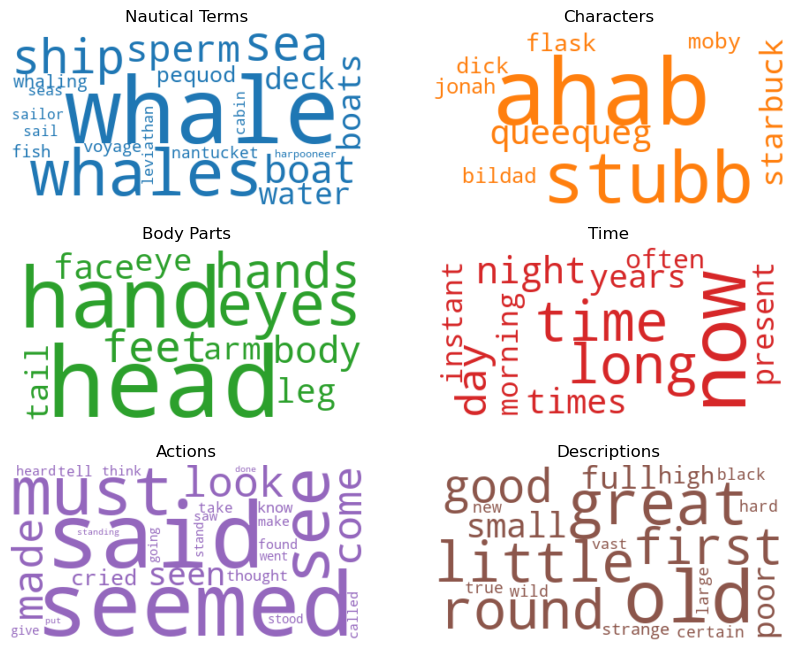

In [66]:
# small multiples word clouds 

def rgb_to_hsl(rgba):
  """Converts RGB color values (ranging from 0 to 255) to HSL values (hue: 0-360, saturation: 0-1, lightness: 0-1)."""

  r, g, b, a = rgba
  
  h, l, s = colorsys.rgb_to_hls(r, g, b)
  
  h_degrees = h * 360 
  
  return h_degrees, s, l

def color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    cmap = mpl.colormaps["tab10"] # Choose color map to use 
    
    rgba = cmap(index / 10) # random samples from color map 
    
    hsl = rgb_to_hsl(rgba)
    
    return f"hsl({hsl[0]}, {hsl[1] * 100}%, {hsl[2] * 100}%)"


word_lists = ["ship, sea, boat, boats, deck, sail, sailor, cabin, voyage, whaling, Pequod, harpooneer, sperm, whale, whales, leviathan, fish, water, seas, Nantucket",
             "Ahab, Stubb, Queequeg, Starbuck, Flask, Bildad, Jonah, Moby, Dick",
             "head, hand, hands, feet, leg, arm, eye, eyes, face, tail, body",
             "now, time, long, years, day, night, morning, instant, often, present, times",
             "said, seemed, must, see, look, made, come, seen, cried, thought, know, tell, think, found, called, make, saw, heard, went, stand, stood, put, done, give, take, going, standing",
             "old, great, little, round, first, good, small, full, poor, high, strange, black, wild, hard, large, vast, new, true, certain"]

titles = ["Nautical Terms", "Characters", "Body Parts", "Time", "Actions", "Descriptions"]

index = 0
fig, axs = plt.subplots(3, 2, figsize=(10, 8))
for i in range(3):
    for j in range(2):
        # get frequencies
        cur_list = word_lists[index]
        cur_freq = {}
        for w in cur_list.split(", "):
            cur_w = w.lower()
            cur_freq[cur_w] = word_dict[cur_w]
        
        cur_cloud = wc.WordCloud(background_color='white').generate_from_frequencies(cur_freq)

        axs[i][j].imshow(cur_cloud.recolor(color_func=color_func, random_state = index), interpolation='bilinear')
        axs[i][j].axis('off')  
        axs[i][j].set_title(titles[index])
        index += 1
plt.show()




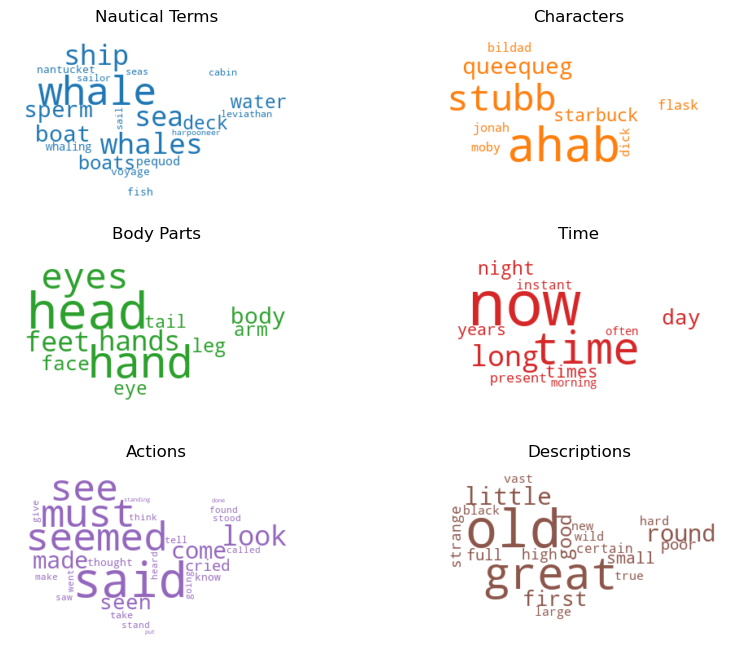

In [71]:
# small multiples word clouds WITH WHALES

def rgb_to_hsl(rgba):
  """Converts RGB color values (ranging from 0 to 255) to HSL values (hue: 0-360, saturation: 0-1, lightness: 0-1)."""

  r, g, b, a = rgba
  
  h, l, s = colorsys.rgb_to_hls(r, g, b)
  
  h_degrees = h * 360 
  
  return h_degrees, s, l

def color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    cmap = mpl.colormaps["tab10"] # Choose color map to use 
    
    rgba = cmap(index / 10) # random samples from color map 
    
    hsl = rgb_to_hsl(rgba)
    
    return f"hsl({hsl[0]}, {hsl[1] * 100}%, {hsl[2] * 100}%)"


word_lists = ["ship, sea, boat, boats, deck, sail, sailor, cabin, voyage, whaling, Pequod, harpooneer, sperm, whale, whales, leviathan, fish, water, seas, Nantucket",
             "Ahab, Stubb, Queequeg, Starbuck, Flask, Bildad, Jonah, Moby, Dick",
             "head, hand, hands, feet, leg, arm, eye, eyes, face, tail, body",
             "now, time, long, years, day, night, morning, instant, often, present, times",
             "said, seemed, must, see, look, made, come, seen, cried, thought, know, tell, think, found, called, make, saw, heard, went, stand, stood, put, done, give, take, going, standing",
             "old, great, little, round, first, good, small, full, poor, high, strange, black, wild, hard, large, vast, new, true, certain"]

titles = ["Nautical Terms", "Characters", "Body Parts", "Time", "Actions", "Descriptions"]

whale_mask = np.array(Image.open("whale_crop.jpg"))

index = 0
fig, axs = plt.subplots(3, 2, figsize=(10, 8))
for i in range(3):
    for j in range(2):
        # get frequencies
        cur_list = word_lists[index]
        cur_freq = {}
        for w in cur_list.split(", "):
            cur_w = w.lower()
            cur_freq[cur_w] = word_dict[cur_w]
        
        cur_cloud = wc.WordCloud(background_color='white', mask = whale_mask).generate_from_frequencies(cur_freq)

        axs[i][j].imshow(cur_cloud.recolor(color_func=color_func, random_state = index), interpolation='bilinear')
        axs[i][j].axis('off')  
        axs[i][j].set_title(titles[index])
        index += 1
plt.show()


